In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as  plt
import seaborn as sns

import random
from random import sample

pd.set_option('display.max_columns', 1000)
from scipy.interpolate import interp1d
from scipy import interpolate as inter
import scipy.stats
from pandas.plotting import table 
import dataframe_image as dfi

from PIL import Image
pd.set_option('mode.chained_assignment',None)

In [2]:
metabolic = pd.read_csv('metabolic_corr.csv',index_col=0)
metabolic_p = pd.read_csv('metabolic_p.csv',index_col=0)


In [3]:
met_shape = metabolic.shape[0]
print(met_shape)

40


In [4]:
display(metabolic.head())
display(metabolic.tail())

TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   

                                       TAdipose - Visceral (Omentum)M010G001  \
TAdipose - SubcutaneousM003G001                                    -0.011745   
TAdipose - SubcutaneousM032G001                                    -0.009905   
TAdipose - SubcutaneousM038G001                                    -0.324818   
TAdipose - Visceral (Omentum)M010G001                               1.000000   
TAdipose - Visceral (Omentum)M024G001                              -0.031693   

                                       TAdipose - Visceral (Omentum)M024G001  \
TAdipose - SubcutaneousM003G001                                    -0.138855   
TAdipose - SubcutaneousM032G001                                    -0.014830   
TAdipose - SubcutaneousM038G001                                     0.011537   
TAdipose - Visceral (Omentum)M010G001                              -0.031693   
TAdipose - Visceral (Omentum)M024G001                               1.000000   

                                       TAdipose - Visceral (Omentum)M025G001  \
TAdipose - SubcutaneousM003G001                                     0.134702   
TAdipose - SubcutaneousM032G001                                    -0.039940   
TAdipose - SubcutaneousM038G001                                    -0.094004   
TAdipose - Visceral (Omentum)M010G001                               0.411618   
TAdipose - Visceral (Omentum)M024G001                               0.215150   

                                       TArtery - AortaM020G001  \
TAdipose - SubcutaneousM003G001                       0.125879   
TAdipose - SubcutaneousM032G001                       0.145727   
TAdipose - SubcutaneousM038G001                      -0.275146   
TAdipose - Visceral (Omentum)M010G001                 0.458490   
TAdipose - Visceral (Omentum)M024G001                -0.084069   

                                       TArtery - AortaM029G001  \
TAdipose - SubcutaneousM003G001                      -0.189432   
TAdipose - SubcutaneousM032G001                      -0.055024   
TAdipose - SubcutaneousM038G001                      -0.079593   
TAdipose - Visceral (Omentum)M010G001                -0.078901   
TAdipose - Visceral (Omentum)M024G001                 0.138485   

                                       TArtery - AortaM031G001  \
TAdipose - SubcutaneousM003G001                      -0.121794   
TAdipose - SubcutaneousM032G001                      -0.101602   
TAdipose - SubcutaneousM038G001                      -0.141973   
TAdipose - Visceral (Omentum)M010G001                -0.084736   
TAdipose - Visceral (Omentum)M024G001                 0.024362   

                                       TArtery - TibialM026G001  \
TAd

TAdipose - SubcutaneousM003G001  \
TTestisM002G001                              0.008517   
TThyroidM018G001                             0.017593   
TThyroidM032G001                            -0.005457   
TWhole BloodM002G001                        -0.069071   
TWhole BloodM007G001                        -0.112304   

                      TAdipose - SubcutaneousM032G001  \
TTestisM002G001                             -0.094100   
TThyroidM018G001                             0.021687   
TThyroidM032G001                            -0.107820   
TWhole BloodM002G001                        -0.033059   
TWhole BloodM007G001                         0.130825   

                      TAdipose - SubcutaneousM038G001  \
TTestisM002G001                              0.094962   
TThyroidM018G001                            -0.231765   
TThyroidM032G001                             0.017032   
TWhole BloodM002G001                        -0.017585   
TWhole BloodM007G001                         0.034238   

                      TAdipose - Visceral (Omentum)M010G001  \
TTestisM002G001                                   -0.150914   
TThyroidM018G001                                   0.267051   
TThyroidM032G001                                   0.168284   
TWhole BloodM002G001                              -0.234466   
TWhole BloodM007G001                              -0.062777   

                      TAdipose - Visceral (Omentum)M024G001  \
TTestisM002G001                                   -0.129553   
TThyroidM018G001                                   0.066359   
TThyroidM032G001                                   0.165905   
TWhole BloodM002G001                              -0.058857   
TWhole BloodM007G001                               0.007039   

                      TAdipose - Visceral (Omentum)M025G001  \
TTestisM002G001                                   -0.170419   
TThyroidM018G001                                   0.251337   
TThyroidM032G001                                   0.272737   
TWhole BloodM002G001                              -0.217780   
TWhole BloodM007G001                              -0.101391   

                      TArtery - AortaM020G001  TArtery - AortaM029G001  \
TTestisM002G001                     -0.120693                 0.151744   
TThyroidM018G001                     0.245640                -0.042085   
TThyroidM032G001                     0.005337                -0.064978   
TWhole BloodM002G001                -0.078293                 0.106190   
TWhole BloodM007G001                -0.191490                -0.093302   

                      TArtery - AortaM031G001  TArtery - TibialM026G001  \
TTestisM002G001                     -0.043459                  0.037677   
TThyroidM018G001                     0.112908                 -0.150268   
TThyroidM032G001                     0.085136                 -0.207944   
TWhole BloodM002G001                 0.022292                 -0.155074   
TWhole BloodM007G001                 0.203131                 -0.022236   

                      TArtery - TibialM029G001  TArtery - TibialM035G001  \
TTestisM002G001                       0.035795                  0.102093   
TThyroidM018G001                      0.339950                  0.155750   
TThyroidM032G001                      0.142135                  0.080693   
TWhole BloodM002G001                 -0.199350                 -0.127404   
TWhole BloodM007G001                 -0.073533                 -0.082806   

                      TBreast - Mammary TissueM016G001  \
TTestisM002G001                               0.322654   
TThyroidM018G001                              0.048877   
TThyroidM032G001                              0.064226   
TWhole BloodM002G001                          0.028272   
TWhole BloodM007G001                         -0.053255   

                      TBreast - Mammary TissueM017G001  \
TTestisM002G001                               0.204458   
TThyroidM018G001                      

In [5]:
display(metabolic_p.head(3))
display(metabolic_p.tail(3))

TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                     1.000000e+00   
TAdipose - SubcutaneousM032G001                     7.187480e-01   
TAdipose - SubcutaneousM038G001                     1.308679e-15   

                                 TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                         0.718748   
TAdipose - SubcutaneousM032G001                         1.000000   
TAdipose - SubcutaneousM038G001                         0.003188   

                                 TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                     1.308679e-15   
TAdipose - SubcutaneousM032G001                     3.188422e-03   
TAdipose - SubcutaneousM038G001                     1.000000e+00   

                                 TAdipose - Visceral (Omentum)M010G001  \
TAdipose - SubcutaneousM003G001                               0.897834   
TAdipose - SubcutaneousM032G001                               0.913772   
TAdipose - SubcutaneousM038G001                               0.000262   

                                 TAdipose - Visceral (Omentum)M024G001  \
TAdipose - SubcutaneousM003G001                               0.127180   
TAdipose - SubcutaneousM032G001                               0.871211   
TAdipose - SubcutaneousM038G001                               0.899637   

                                 TAdipose - Visceral (Omentum)M025G001  \
TAdipose - SubcutaneousM003G001                               0.139070   
TAdipose - SubcutaneousM032G001                               0.662270   
TAdipose - SubcutaneousM038G001                               0.303058   

                                 TArtery - AortaM020G001  \
TAdipose - SubcutaneousM003G001                 0.265875   
TAdipose - SubcutaneousM032G001                 0.197118   
TAdipose - SubcutaneousM038G001                 0.013507   

                                 TArtery - AortaM029G001  \
TAdipose - SubcutaneousM003G001                 0.092387   
TAdipose - SubcutaneousM032G001                 0.627840   
TAdipose - SubcutaneousM038G001                 0.482795   

                                 TArtery - AortaM031G001  \
TAdipose - SubcutaneousM003G001                 0.281828   
TAdipose - SubcutaneousM032G001                 0.369836   
TAdipose - SubcutaneousM038G001                 0.209030   

                                 TArtery - TibialM026G001  \
TAdipose - SubcutaneousM003G001              1.722750e-01   
TAdipose - SubcutaneousM032G001              2.042857e-03   
TAdipose - SubcutaneousM038G001              7.794057e-07   

                                 TArtery - TibialM029G001  \
TAdipose - SubcutaneousM003G001              7.472065e-01   
TAdipose - SubcutaneousM032G001              1.534104e-07   
TAdipose - SubcutaneousM038G001              2.514976e-07   

                                 TArtery - TibialM035G001  \
TAdipose - SubcutaneousM003G001                  0.024677   
TAdipose - SubcutaneousM032G001                  0.004489   
TAdipose - SubcutaneousM038G001                  0.542353   

                                 TBreast - Mammary TissueM016G001  \
TAdipose - SubcutaneousM003G001                          0.117292   
TAdipose - SubcutaneousM032G001                          0.836725   
TAdipose - SubcutaneousM038G001                          0.951757   

                                 TBreast - Mammary TissueM017G001  \
TAdipose - SubcutaneousM003G001                          0.027163   
TAdipose - SubcutaneousM032G001                          0.501189   
TAdipose - SubcutaneousM038G001                          0.413960   

                                 TCells - Cultured fibroblastsM002G001  \
TAdipose - SubcutaneousM003G001                               0.783771   
TAdipose - SubcutaneousM032G001                               0.180331   
TAdipose - SubcutaneousM038G001                               0.802734   

              

TAdipose - SubcutaneousM003G001  \
TThyroidM032G001                             0.947699   
TWhole BloodM002G001                         0.388499   
TWhole BloodM007G001                         0.160056   

                      TAdipose - SubcutaneousM032G001  \
TThyroidM032G001                             0.193642   
TWhole BloodM002G001                         0.680081   
TWhole BloodM007G001                         0.101331   

                      TAdipose - SubcutaneousM038G001  \
TThyroidM032G001                             0.837764   
TWhole BloodM002G001                         0.826413   
TWhole BloodM007G001                         0.669326   

                      TAdipose - Visceral (Omentum)M010G001  \
TThyroidM032G001                                   0.066166   
TWhole BloodM002G001                               0.007972   
TWhole BloodM007G001                               0.483204   

                      TAdipose - Visceral (Omentum)M024G001  \
TThyroidM032G001                                   0.070149   
TWhole BloodM002G001                               0.510988   
TWhole BloodM007G001                               0.937392   

                      TAdipose - Visceral (Omentum)M025G001  \
TThyroidM032G001                                    0.00258   
TWhole BloodM002G001                                0.01391   
TWhole BloodM007G001                                0.25669   

                      TArtery - AortaM020G001  TArtery - AortaM029G001  \
TThyroidM032G001                     0.960414                 0.545197   
TWhole BloodM002G001                 0.468411                 0.324776   
TWhole BloodM007G001                 0.073900                 0.387245   

                      TArtery - AortaM031G001  TArtery - TibialM026G001  \
TThyroidM032G001                     0.427628                  0.013019   
TWhole BloodM002G001                 0.836670                  0.052466   
TWhole BloodM007G001                 0.057678                  0.782222   

                      TArtery - TibialM029G001  TArtery - TibialM035G001  \
TThyroidM032G001                      0.091538                  0.339767   
TWhole BloodM002G001                  0.012312                  0.111814   
TWhole BloodM007G001                  0.360064                  0.302522   

                      TBreast - Mammary TissueM016G001  \
TThyroidM032G001                              0.536343   
TWhole BloodM002G001                          0.775729   
TWhole BloodM007G001                          0.591324   

                      TBreast - Mammary TissueM017G001  \
TThyroidM032G001                              0.148038   
TWhole BloodM002G001                          0.986057   
TWhole BloodM007G001                          0.283160   

                      TCells - Cultured fibroblastsM002G001  \
TThyroidM032G001                                   0.297832   
TWhole BloodM002G001                               0.676523   
TWhole BloodM007G001                               0.818655   

                      TEsophagus - MucosaM022G001  \
TThyroidM032G001                         0.024614   
TWhole BloodM002G001                     0.924790   
TWhole BloodM007G001                     0.211932   

                      TEsophagus - MuscularisM019G001  \
TThyroidM032G001                             0.049675   
TWhole BloodM002G001                         0.674501   
TWhole BloodM007G001                         0.266480   

                      TEsophagus - MuscularisM035G001  \
TThyroidM032G001                             0.054613   
TWhole BloodM002G001                         0.243044   
TWhole BloodM007G001                         0.899848   

                      THeart - Atrial AppendageM003G001  \
TThyroidM032G001                               0.731960   
TWhole BloodM002G001                           0.079121   
TWhole BloodM007G001                           0.283911   

                      THeart - Atrial Appendag

In [6]:
corr_thresholds = list(range(5, 251, 5))
myInt = 5000
corr_thresholds[:] = [x / myInt for x in corr_thresholds]
print(corr_thresholds)
print(len(corr_thresholds))

pos_cases = [0]*50
neg_cases = [0]*50
random_cases = [0]*50





[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]
50


In [7]:
#corrlist = []

met_corrlist = []
met_plist = []

metabolic_indexes = metabolic.index.tolist()
metabolic_columns = metabolic.columns.tolist()

for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        #if meti !=metj:
        met_corrlist.append(metabolic.iloc[i,j])
        met_plist.append(metabolic_p.iloc[i,j])
        
inter_met_corr = len(met_corrlist)
print(inter_met_corr)



780


In [8]:
d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'random expectation' : random_cases
     }
     
df_p = pd.DataFrame(d)

display(df_p)

                   
        

corr thresholds  pos cases  neg cases  random expectation
0             0.001          0          0                   0
1             0.002          0          0                   0
2             0.003          0          0                   0
3             0.004          0          0                   0
4             0.005          0          0                   0
5             0.006          0          0                   0
6             0.007          0          0                   0
7             0.008          0          0                   0
8             0.009          0          0                   0
9             0.010          0          0                   0
10            0.011          0          0                   0
11            0.012          0          0                   0
12            0.013          0          0                   0
13            0.014          0          0                   0
14            0.015          0          0                   0
15            0.016          0          0                   0
16            0.017          0          0                   0
17            0.018          0          0                   0
18            0.019          0          0                   0
19            0.020          0          0                   0
20            0.021          0          0                   0
21            0.022          0          0                   0
22            0.023          0          0                   0
23            0.024          0          0                   0
24            0.025          0          0                   0
25            0.026          0          0                   0
26            0.027          0          0                   0
27            0.028          0          0                   0
28            0.029          0          0                   0
29            0.030          0          0                   0
30            0.031          0          0                   0
31            0.032          0          0                   0
32            0.033          0          0                   0
33            0.034          0          0                   0
34            0.035          0          0                   0
35            0.036          0          0                   0
36            0.037          0          0                   0
37            0.038          0          0                   0
38            0.039          0          0                   0
39            0.040          0          0                   0
40            0.041          0          0                   0
41            0.042          0          0                   0
42            0.043          0          0                   0
43            0.044          0          0                   0
44            0.045          0          0                   0
45            0.046          0          0                   0
46            0.047          0          0                   0
47            0.048          0          0                   0
48            0.049          0          0                   0
49            0.050          0          0                   0

In [9]:
display(metabolic_p.head(3))

TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                     1.000000e+00   
TAdipose - SubcutaneousM032G001                     7.187480e-01   
TAdipose - SubcutaneousM038G001                     1.308679e-15   

                                 TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                         0.718748   
TAdipose - SubcutaneousM032G001                         1.000000   
TAdipose - SubcutaneousM038G001                         0.003188   

                                 TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                     1.308679e-15   
TAdipose - SubcutaneousM032G001                     3.188422e-03   
TAdipose - SubcutaneousM038G001                     1.000000e+00   

                                 TAdipose - Visceral (Omentum)M010G001  \
TAdipose - SubcutaneousM003G001                               0.897834   
TAdipose - SubcutaneousM032G001                               0.913772   
TAdipose - SubcutaneousM038G001                               0.000262   

                                 TAdipose - Visceral (Omentum)M024G001  \
TAdipose - SubcutaneousM003G001                               0.127180   
TAdipose - SubcutaneousM032G001                               0.871211   
TAdipose - SubcutaneousM038G001                               0.899637   

                                 TAdipose - Visceral (Omentum)M025G001  \
TAdipose - SubcutaneousM003G001                               0.139070   
TAdipose - SubcutaneousM032G001                               0.662270   
TAdipose - SubcutaneousM038G001                               0.303058   

                                 TArtery - AortaM020G001  \
TAdipose - SubcutaneousM003G001                 0.265875   
TAdipose - SubcutaneousM032G001                 0.197118   
TAdipose - SubcutaneousM038G001                 0.013507   

                                 TArtery - AortaM029G001  \
TAdipose - SubcutaneousM003G001                 0.092387   
TAdipose - SubcutaneousM032G001                 0.627840   
TAdipose - SubcutaneousM038G001                 0.482795   

                                 TArtery - AortaM031G001  \
TAdipose - SubcutaneousM003G001                 0.281828   
TAdipose - SubcutaneousM032G001                 0.369836   
TAdipose - SubcutaneousM038G001                 0.209030   

                                 TArtery - TibialM026G001  \
TAdipose - SubcutaneousM003G001              1.722750e-01   
TAdipose - SubcutaneousM032G001              2.042857e-03   
TAdipose - SubcutaneousM038G001              7.794057e-07   

                                 TArtery - TibialM029G001  \
TAdipose - SubcutaneousM003G001              7.472065e-01   
TAdipose - SubcutaneousM032G001              1.534104e-07   
TAdipose - SubcutaneousM038G001              2.514976e-07   

                                 TArtery - TibialM035G001  \
TAdipose - SubcutaneousM003G001                  0.024677   
TAdipose - SubcutaneousM032G001                  0.004489   
TAdipose - SubcutaneousM038G001                  0.542353   

                                 TBreast - Mammary TissueM016G001  \
TAdipose - SubcutaneousM003G001                          0.117292   
TAdipose - SubcutaneousM032G001                          0.836725   
TAdipose - SubcutaneousM038G001                          0.951757   

                                 TBreast - Mammary TissueM017G001  \
TAdipose - SubcutaneousM003G001                          0.027163   
TAdipose - SubcutaneousM032G001                          0.501189   
TAdipose - SubcutaneousM038G001                          0.413960   

                                 TCells - Cultured fibroblastsM002G001  \
TAdipose - SubcutaneousM003G001                               0.783771   
TAdipose - SubcutaneousM032G001                               0.180331   
TAdipose - SubcutaneousM038G001                               0.802734   

              

In [10]:
for i in range(df_p.shape[0]):
    count_pos = 1
    count_neg = 1
    for j in range(len(met_corrlist)):
        if met_corrlist[j] >= 0:
            if met_plist[j] < df_p['corr thresholds'].iloc[i]:
                count_pos +=1
    for j in range(len(met_corrlist)):
        if met_corrlist[j] <= 0:
            if met_plist[j] < df_p['corr thresholds'].iloc[i]:
                count_neg +=1
            
    df_p['pos cases'].iloc[i] = count_pos
    df_p['neg cases'].iloc[i] = count_neg
    #df_p['ratio pos neg'].iloc[i] = count_pos / max(count_neg,1)
df_p['ratio']  = df_p['pos cases'] / df_p['neg cases']
df_p['random expectation'] = inter_met_corr * df_p['corr thresholds']

display(df_p.head(26))

corr thresholds  pos cases  neg cases  random expectation     ratio
0             0.001         27         12                0.78  2.250000
1             0.002         32         12                1.56  2.666667
2             0.003         37         15                2.34  2.466667
3             0.004         41         17                3.12  2.411765
4             0.005         43         20                3.90  2.150000
5             0.006         46         20                4.68  2.300000
6             0.007         48         20                5.46  2.400000
7             0.008         50         21                6.24  2.380952
8             0.009         52         21                7.02  2.476190
9             0.010         52         24                7.80  2.166667
10            0.011         56         24                8.58  2.333333
11            0.012         56         24                9.36  2.333333
12            0.013         57         26               10.14  2.192308
13            0.014         57         29               10.92  1.965517
14            0.015         58         30               11.70  1.933333
15            0.016         58         32               12.48  1.812500
16            0.017         58         33               13.26  1.757576
17            0.018         60         34               14.04  1.764706
18            0.019         63         35               14.82  1.800000
19            0.020         63         35               15.60  1.800000
20            0.021         64         36               16.38  1.777778
21            0.022         64         36               17.16  1.777778
22            0.023         66         38               17.94  1.736842
23            0.024         68         41               18.72  1.658537
24            0.025         70         42               19.50  1.666667
25            0.026         70         42               20.28  1.666667

In [11]:

display(df_p.tail(26))

corr thresholds  pos cases  neg cases  random expectation     ratio
24            0.025         70         42               19.50  1.666667
25            0.026         70         42               20.28  1.666667
26            0.027         71         42               21.06  1.690476
27            0.028         72         43               21.84  1.674419
28            0.029         72         45               22.62  1.600000
29            0.030         72         45               23.40  1.600000
30            0.031         73         45               24.18  1.622222
31            0.032         77         45               24.96  1.711111
32            0.033         77         46               25.74  1.673913
33            0.034         77         46               26.52  1.673913
34            0.035         78         46               27.30  1.695652
35            0.036         78         46               28.08  1.695652
36            0.037         78         46               28.86  1.695652
37            0.038         79         48               29.64  1.645833
38            0.039         81         48               30.42  1.687500
39            0.040         81         49               31.20  1.653061
40            0.041         81         49               31.98  1.653061
41            0.042         81         49               32.76  1.653061
42            0.043         81         49               33.54  1.653061
43            0.044         83         49               34.32  1.693878
44            0.045         83         49               35.10  1.693878
45            0.046         83         50               35.88  1.660000
46            0.047         84         54               36.66  1.555556
47            0.048         85         54               37.44  1.574074
48            0.049         85         54               38.22  1.574074
49            0.050         87         55               39.00  1.581818

In [12]:
tissue_key = pd.read_csv('IncludedTissuesSelect.csv',index_col=0)
display(tissue_key.head(19))

tissue_key_index_list = tissue_key.index.tolist()
data_frames = []
for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    print(current)

Quantity
Tissue Type                                  
Adipose - Subcutaneous                      3
Adipose - Visceral (Omentum)                3
Artery - Aorta                              3
Artery - Tibial                             3
Breast - Mammary Tissue                     2
Cells - Cultured fibroblasts                1
Esophagus - Mucosa                          1
Esophagus - Muscularis                      2
Heart - Atrial Appendage                    2
Heart - Left Ventricle                      1
Liver                                       3
Lung                                        4
Muscle - Skeletal                           1
Nerve - Tibial                              2
Skin - Not Sun Exposed (Suprapubic)         2
Skin - Sun Exposed (Lower leg)              2
Testis                                      1
Thyroid                                     2
Whole Blood                                 2

TAdipose - Subcutaneous_df.csv
TAdipose - Visceral (Omentum)_df.csv
TArtery - Aorta_df.csv
TArtery - Tibial_df.csv
TBreast - Mammary Tissue_df.csv
TCells - Cultured fibroblasts_df.csv
TEsophagus - Mucosa_df.csv
TEsophagus - Muscularis_df.csv
THeart - Atrial Appendage_df.csv
THeart - Left Ventricle_df.csv
TLiver_df.csv
TLung_df.csv
TMuscle - Skeletal_df.csv
TNerve - Tibial_df.csv
TSkin - Not Sun Exposed (Suprapubic)_df.csv
TSkin - Sun Exposed (Lower leg)_df.csv
TTestis_df.csv
TThyroid_df.csv
TWhole Blood_df.csv


In [13]:
tissue_key_index_list = tissue_key.index.tolist()
data_frames = []


for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    data_frames.append(current)

tissue_key['DataFrames'] = data_frames
display(tissue_key.head())

Quantity                            DataFrames
Tissue Type                                                                 
Adipose - Subcutaneous               3        TAdipose - Subcutaneous_df.csv
Adipose - Visceral (Omentum)         3  TAdipose - Visceral (Omentum)_df.csv
Artery - Aorta                       3                TArtery - Aorta_df.csv
Artery - Tibial                      3               TArtery - Tibial_df.csv
Breast - Mammary Tissue              2       TBreast - Mammary Tissue_df.csv

In [14]:
def select_subset(seedbasis):
    modules = []
    for i in range(tissue_key.shape[0]):
        current_seed = seedbasis+i
        sample_size = tissue_key['Quantity'].iloc[i]
        current_df = tissue_key['DataFrames'].iloc[i]
        df = pd.read_csv(current_df,index_col=0)
        df = df.sample(random_state=current_seed, n=sample_size, axis=1)
        df_columns = df.columns.tolist()
        for j in range(len(df_columns)):
            modules.append(df_columns[j])
        #print(modules)
        #print(len(modules))
    return(modules)

a = select_subset(2000)
print(a)

['TAdipose - SubcutaneousM006G002', 'TAdipose - SubcutaneousM018G006', 'TAdipose - SubcutaneousM012G099', 'TAdipose - Visceral (Omentum)M022G005', 'TAdipose - Visceral (Omentum)M009G006', 'TAdipose - Visceral (Omentum)M023G005', 'TArtery - AortaM022G099', 'TArtery - AortaM036G099', 'TArtery - AortaM049G099', 'TArtery - TibialM023G002', 'TArtery - TibialM028G099', 'TArtery - TibialM020G099', 'TBreast - Mammary TissueM001G002', 'TBreast - Mammary TissueM014G005', 'TCells - Cultured fibroblastsM003G006', 'TEsophagus - MucosaM021G006', 'TEsophagus - MuscularisM027G005', 'TEsophagus - MuscularisM008G002', 'THeart - Atrial AppendageM016G003', 'THeart - Atrial AppendageM021G003', 'THeart - Left VentricleM015G002', 'TLiverM034G099', 'TLiverM037G006', 'TLiverM006G006', 'TLungM003G004', 'TLungM020G006', 'TLungM017G006', 'TLungM002G099', 'TMuscle - SkeletalM014G006', 'TNerve - TibialM049G099', 'TNerve - TibialM046G099', 'TSkin - Not Sun Exposed (Suprapubic)M010G006', 'TSkin - Not Sun Exposed (Sup

In [15]:
all_corrs = pd.read_csv('big_corr.csv',index_col=0)
print(all_corrs.shape)


(609, 609)


In [16]:
all_ps = pd.read_csv('big_p.csv',index_col=0)
print(all_ps.shape)

(609, 609)


In [17]:
all_corrs_values = []
all_p_values = []

big_indexes = all_corrs.index.tolist()
big_columns = all_corrs.columns.tolist()



for i in range(all_corrs.shape[0]):
    for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        #if alli !=allj:
        all_corrs_values.append(all_corrs.iloc[i,j])
        all_p_values.append(all_ps.iloc[i,j])
            
        
            
        
            
print(len(all_corrs_values))


185136


In [18]:
def make_smaller_df(df_cor,df_pvalue,random_state_seed):
    
    sub_corrs = select_subset(random_state_seed)
    #print(sub_corrs)
    
    df1_cor = df_cor.copy(deep=True)
    df1_p = df_pvalue.copy(deep=True)
    df1_cor =  df1_cor[sub_corrs]
    df1_cor = df1_cor.loc[sub_corrs]
    df1_p =  df1_p[sub_corrs]
    df1_p = df1_p.loc[sub_corrs]
    
    
    
    
    
    

    return df1_cor, df1_p

df1_c, df2_p = make_smaller_df(all_corrs,all_ps,1000)
print(df1_c.shape)
print(df2_p.shape)





    


(40, 40)
(40, 40)


In [19]:
def one_iteration_subsample(df,df_p,random_state_seed):
    
    
    df2, df2_p = make_smaller_df(df,df_p,random_state_seed)
    

    df2_index = df2.index.tolist()
    df2_columns = df2.columns.tolist()
    
    corr2list = []
    corr2p = []
    
    '''
    for i in range(all_corrs.shape[0]):
        for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        if alli !=allj:
            all_corrs_values.append(all_corrs.iloc[i,j])
            all_p_values.append(all_ps.iloc[i,j])
    '''
    
    
    for i in range(df2.shape[0]):
        for j in range(i+1,df2.shape[1]):
            alli = df2_index[i]
            allj = df2_columns[j]
            alli = alli[1:-8]
            allj = allj[1:-8]
                
            #if alli !=allj:
            
            corr2list.append(df2.iloc[i,j])
            corr2p.append(df2_p.iloc[i,j])
    
            
            
    corr_thresholds = list(range(5, 251, 5))
    myInt = 5000
    corr_thresholds[:] = [x / myInt for x in corr_thresholds]
    #print(corr_thresholds)
    #print(len(corr_thresholds))


    pos_cases = [0]*50
    neg_cases = [0]*50
    ratios = [0]*50
    
    
    d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,    
     'ratios'    : ratios
         
     }
     
    df_p = pd.DataFrame(d)
   


    for i in range(df_p.shape[0]):
        count_pos = 1
        count_neg = 1
        for j in range(len(corr2list)):
            if corr2list[j] >= 0:
                if corr2p[j] < df_p['corr thresholds'].iloc[i]:
                    count_pos +=1
                
            #if corr2list[j] >= df_metabolic['corr thresholds'].iloc[i]:
            #    count_pos +=1
        for j in range(len(corr2list)):
            if corr2list[j] <= 0:
                if corr2p[j] < df_p['corr thresholds'].iloc[i]:
                    count_neg +=1
            
        df_p['pos cases'].iloc[i] = count_pos
        df_p['neg cases'].iloc[i] = count_neg
        #df_corr_stats['ratio pos neg'].iloc[i] = count_pos / max(1,count_neg)
    df_p['ratios'] = df_p['pos cases'] / df_p['neg cases']
    #print('iteration')
    #print(df_p.shape)
    #print(len(corr2list))
    return df_p






In [20]:
corr_big_list = []
pos_big_list = []
neg_big_list = []
ratio_big_list = []



for k in range(1000):
    if (k % 100 == 0):
        print (k)
    k_times1000 = k*1000
    df_stats = one_iteration_subsample(all_corrs,all_ps,k_times1000 )
    threshold = df_stats['corr thresholds'].tolist()
    positives = df_stats['pos cases'].tolist()
    negatives = df_stats['neg cases'].tolist()
    ratios = df_stats['ratios'].tolist()
    corr_big_list = corr_big_list+threshold
    pos_big_list = pos_big_list+positives
    neg_big_list = neg_big_list+negatives
    ratio_big_list = ratio_big_list + ratios

#print(len(corr_big_list))
    
    
   

0
100
200
300
400
500
600
700
800
900


In [21]:
display(df_stats.max())

corr thresholds     0.050000
pos cases          77.000000
neg cases          76.000000
ratios              1.026667
dtype: float64

In [22]:
display(df_stats.min())

corr thresholds     0.001000
pos cases          17.000000
neg cases          28.000000
ratios              0.606061
dtype: float64

In [23]:
print(df_stats.shape)

(50, 4)


In [24]:
d = {'corr thresholds' : corr_big_list, 
     'pos cases' : pos_big_list,
     'neg cases' : neg_big_list,
     'ratios' : ratio_big_list
     }
     
df_corr_stats = pd.DataFrame(d)
print(df_corr_stats.shape)
display(df_corr_stats.head(3))
display(df_corr_stats.tail(4))



(50000, 4)


corr thresholds  pos cases  neg cases    ratios
0            0.001         32         26  1.230769
1            0.002         36         37  0.972973
2            0.003         42         39  1.076923

corr thresholds  pos cases  neg cases    ratios
49996            0.047         77         75  1.026667
49997            0.048         77         75  1.026667
49998            0.049         77         75  1.026667
49999            0.050         77         76  1.013158

In [25]:
display(df_corr_stats.max())

corr thresholds      0.05
pos cases          127.00
neg cases          118.00
ratios              10.50
dtype: float64

In [26]:
display(df_corr_stats.min())

corr thresholds    0.001000
pos cases          5.000000
neg cases          2.000000
ratios             0.285714
dtype: float64

In [27]:
print(df_corr_stats.shape)

(50000, 4)


In [28]:
df_corr_stats.replace([np.inf, -np.inf], 1, inplace=True)

In [29]:
quantile95 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)
quantile90 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [30]:
display(quantile95.sample(34))

pos cases  neg cases    ratios
corr thresholds                                
0.013                59.00      60.00  1.437625
0.016                63.00      64.05  1.423135
0.047                91.00      91.05  1.338235
0.012                57.00      59.00  1.434918
0.048                92.00      92.05  1.318743
0.004                44.00      43.00  1.647315
0.030                78.00      79.00  1.382466
0.025                73.00      74.00  1.387097
0.031                79.00      79.05  1.386022
0.015                61.00      63.05  1.437576
0.033                81.00      82.00  1.367347
0.045                90.00      90.05  1.340143
0.035                83.00      83.00  1.379345
0.003                41.00      40.00  1.636688
0.040                87.00      87.00  1.372987
0.043                89.00      88.00  1.358599
0.039                86.05      86.00  1.371063
0.019                67.00      68.00  1.415014
0.006                49.00      48.00  1.590909
0.046                91.00      91.00  1.333631
0.034                82.00      83.00  1.373285
0.024                72.00      73.00  1.384703
0.036                84.00      84.05  1.377116
0.041                88.00      87.00  1.361871
0.005                46.00      46.00  1.611325
0.038                85.00      85.00  1.377778
0.050                93.00      94.00  1.326598
0.011                56.00      57.00  1.437500
0.009                53.00      54.00  1.486429
0.022                69.00      71.00  1.400213
0.007                50.05      50.00  1.530441
0.001                32.00      31.00  1.867083
0.037                84.00      85.00  1.376660
0.010                55.00      56.00  1.467407

In [31]:
display(quantile90.sample(34))

pos cases  neg cases    ratios
corr thresholds                                
0.041                 82.0       82.0  1.264766
0.016                 59.0       59.0  1.312500
0.048                 87.0       87.0  1.250000
0.023                 67.0       67.0  1.288504
0.039                 80.0       81.0  1.262381
0.046                 85.0       86.0  1.250000
0.034                 76.0       77.0  1.263158
0.008                 47.0       48.0  1.350484
0.011                 52.0       52.0  1.318364
0.022                 65.0       66.0  1.294706
0.004                 39.0       39.0  1.462051
0.049                 88.0       87.1  1.241484
0.001                 29.0       28.0  1.615385
0.019                 62.0       62.0  1.290323
0.018                 61.0       61.1  1.295119
0.003                 37.0       36.0  1.500000
0.036                 77.0       78.0  1.261905
0.020                 63.0       64.0  1.296454
0.024                 67.1       68.0  1.294557
0.029                 72.0       72.1  1.276537
0.040                 81.0       81.0  1.259420
0.045                 84.0       85.0  1.253165
0.032                 74.0       75.0  1.268293
0.044                 84.0       84.0  1.254268
0.033                 75.0       76.0  1.268490
0.042                 83.0       83.0  1.255319
0.014                 56.0       56.0  1.322581
0.025                 69.0       69.0  1.282650
0.026                 70.0       70.0  1.290457
0.012                 53.0       54.0  1.333333
0.043                 83.0       84.0  1.255947
0.015                 57.0       58.0  1.316469
0.047                 86.0       86.0  1.250333
0.010                 51.0       51.0  1.333333

In [32]:
quantile90 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [33]:
display(quantile90.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.001                 29.0       28.0  1.615385
0.002                 33.1       33.0  1.541667
0.003                 37.0       36.0  1.500000
0.004                 39.0       39.0  1.462051
0.005                 42.0       42.0  1.400000
0.006                 44.0       44.0  1.400000
0.007                 46.0       46.0  1.379615
0.008                 47.0       48.0  1.350484
0.009                 49.0       50.0  1.350000
0.010                 51.0       51.0  1.333333
0.011                 52.0       52.0  1.318364
0.012                 53.0       54.0  1.333333
0.013                 55.0       55.0  1.333333
0.014                 56.0       56.0  1.322581
0.015                 57.0       58.0  1.316469
0.016                 59.0       59.0  1.312500
0.017                 60.0       60.0  1.290457
0.018                 61.0       61.1  1.295119
0.019                 62.0       62.0  1.290323
0.020                 63.0       64.0  1.296454
0.021                 64.0       65.0  1.289032
0.022                 65.0       66.0  1.294706
0.023                 67.0       67.0  1.288504
0.024                 67.1       68.0  1.294557
0.025                 69.0       69.0  1.282650
0.026                 70.0       70.0  1.290457
0.027                 71.0       71.0  1.289032
0.028                 71.0       72.0  1.278540
0.029                 72.0       72.1  1.276537
0.030                 73.0       73.0  1.277907
0.031                 74.0       74.0  1.282681
0.032                 74.0       75.0  1.268293
0.033                 75.0       76.0  1.268490
0.034                 76.0       77.0  1.263158

In [34]:
display(quantile95.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.001                32.00      31.00  1.867083
0.002                37.00      37.00  1.750000
0.003                41.00      40.00  1.636688
0.004                44.00      43.00  1.647315
0.005                46.00      46.00  1.611325
0.006                49.00      48.00  1.590909
0.007                50.05      50.00  1.530441
0.008                52.00      52.00  1.500000
0.009                53.00      54.00  1.486429
0.010                55.00      56.00  1.467407
0.011                56.00      57.00  1.437500
0.012                57.00      59.00  1.434918
0.013                59.00      60.00  1.437625
0.014                60.00      61.05  1.450000
0.015                61.00      63.05  1.437576
0.016                63.00      64.05  1.423135
0.017                64.00      66.00  1.416944
0.018                65.00      67.00  1.409368
0.019                67.00      68.00  1.415014
0.020                67.00      69.00  1.419440
0.021                68.05      70.00  1.404762
0.022                69.00      71.00  1.400213
0.023                70.00      72.00  1.395373
0.024                72.00      73.00  1.384703
0.025                73.00      74.00  1.387097
0.026                74.00      75.00  1.380000
0.027                75.00      76.00  1.372238
0.028                76.00      77.00  1.384615
0.029                77.00      77.05  1.387307
0.030                78.00      79.00  1.382466
0.031                79.00      79.05  1.386022
0.032                80.00      81.00  1.389904
0.033                81.00      82.00  1.367347
0.034                82.00      83.00  1.373285

In [35]:
df_all_corr_averages = df_corr_stats.groupby('corr thresholds').mean()

df_all_corr_std = df_corr_stats.groupby('corr thresholds').std()

df_all_corr_std.rename(columns = {'pos cases':'pos std', 
                                  'neg cases':'neg std',
                                  'ratios' : 'ratio std'}, inplace = True)

df_all = pd.concat([df_all_corr_averages, df_all_corr_std], join="inner",axis=1)

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] < 1:
        df_all['neg cases'].iloc[i] = 1
        
        


df_all['pos lower'] = df_all['pos cases'] - df_all['pos std']
df_all['pos higher'] = df_all['pos cases'] + df_all['pos std']
df_all['neg lower'] = df_all['neg cases'] - df_all['neg std']
df_all['neg higher'] = df_all['neg cases'] + df_all['neg std']



df_all['ratios'] = df_all['pos cases'] / df_all['neg cases']
display(df_all)

pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.001               19.588     18.837  1.039868   6.967554   6.819159   
0.002               23.112     22.587  1.023243   7.721857   7.720754   
0.003               25.827     25.373  1.017893   8.323001   8.268509   
0.004               27.997     27.694  1.010941   8.692212   8.740524   
0.005               29.932     29.687  1.008253   9.011914   9.109776   
0.006               31.581     31.398  1.005828   9.314301   9.410960   
0.007               33.168     33.280  0.996635   9.697103   9.675599   
0.008               34.413     35.018  0.982723   9.919114   9.931481   
0.009               35.813     36.406  0.983711  10.104956  10.190437   
0.010               36.977     37.624  0.982804  10.377098  10.421767   
0.011               38.174     38.942  0.980278  10.487407  10.527843   
0.012               39.293     40.029  0.981613  10.628458  10.668645   
0.013               40.500     41.160  0.983965  10.816422  10.877809   
0.014               41.704     42.304  0.985817  10.888110  11.048876   
0.015               42.768     43.495  0.983285  10.973267  11.257029   
0.016               43.778     44.514  0.983466  11.110272  11.351417   
0.017               44.829     45.617  0.982726  11.282067  11.516377   
0.018               45.963     46.629  0.985717  11.384166  11.549145   
0.019               46.999     47.509  0.989265  11.498662  11.701746   
0.020               48.079     48.411  0.993142  11.554231  11.822091   
0.021               49.007     49.217  0.995733  11.706494  11.910658   
0.022               49.883     50.051  0.996643  11.824260  11.988834   
0.023               50.791     51.009  0.995726  11.919874  12.107333   
0.024               51.661     51.877  0.995836  12.023587  12.204459   
0.025               52.657     52.788  0.997518  12.151008  12.315630   
0.026               53.491     53.624  0.997520  12.281806  12.442244   
0.027               54.363     54.511  0.997285  12.333343  12.550354   
0.028               55.021     55.245  0.995945  12.422757  12.623166   
0.029               55.858     55.900  0.999249  12.528320  12.697371   
0.030               56.532     56.662  0.997706  12.597844  12.811162   
0.031               57.281     57.408  0.997788  12.710610  12.920157   
0.032               58.013     58.167  0.997352  12.720402  13.014472   
0.033               58.676     58.915  0.995943  12.793776  13.079941   
0.034               59.486     59.685  0.996666  12.845108  13.129972   
0.035               60.353     60.259  1.001560  12.949675  13.148034   
0.036               61.064     60.911  1.002512  12.990714  13.200581   
0.037               61.756     61.515  1.003918  13.024827  13.294906   
0.038               62.503     62.181  1.005178  13.131734  13.339347   
0.039               63.237     62.990  1.003921  13.173320  13.481976   
0.040               63.756     63.509  1.003889  13.245222  13.472692   
0.041               64.558     64.203  1.005529  13.317657  13.512008   
0.042               65.273     64.922  1.005406  13.387595  13.532444   
0.043               65.847     65.595  1.003842  13.402807  13.596906   
0.044               66.514     66.272  1.003652  13.446658  13.625332   
0.045               67.061     66.898  1.002437  13.509841  13.642350   
0.046               67.719     67.476  1.003601  13.569088  13.746577   
0.047               68.373     68.030  1.005042  13.675339  13.765267   
0.048               68.930     68.664  1.003874  13.725797  13.837072   
0.049               69.590     69.167  1.006116  13.772566  13.859336   
0.050               70.232     69.875  1.005109  13.826400  13.876741   

                 ratio std  pos lower  pos higher  neg lower  neg higher  
corr thresholds                                                           
0.001             0.531210  12.620446   26.555554  12.017841   25.6561

In [36]:
df_all['ratios'] =  df_all['ratios'].replace(np.inf, 1)
df_all['ratios'] =  df_all['ratios'].replace(np.nan, 0)
df_all['ratios'] =  df_all['ratios']
df_all['ratios std plus'] = df_all['ratios']+ df_all['ratio std']
df_all['ratios std minus'] = df_all['ratios'] - df_all['ratio std']

display(df_all)


pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.001               19.588     18.837  1.039868   6.967554   6.819159   
0.002               23.112     22.587  1.023243   7.721857   7.720754   
0.003               25.827     25.373  1.017893   8.323001   8.268509   
0.004               27.997     27.694  1.010941   8.692212   8.740524   
0.005               29.932     29.687  1.008253   9.011914   9.109776   
0.006               31.581     31.398  1.005828   9.314301   9.410960   
0.007               33.168     33.280  0.996635   9.697103   9.675599   
0.008               34.413     35.018  0.982723   9.919114   9.931481   
0.009               35.813     36.406  0.983711  10.104956  10.190437   
0.010               36.977     37.624  0.982804  10.377098  10.421767   
0.011               38.174     38.942  0.980278  10.487407  10.527843   
0.012               39.293     40.029  0.981613  10.628458  10.668645   
0.013               40.500     41.160  0.983965  10.816422  10.877809   
0.014               41.704     42.304  0.985817  10.888110  11.048876   
0.015               42.768     43.495  0.983285  10.973267  11.257029   
0.016               43.778     44.514  0.983466  11.110272  11.351417   
0.017               44.829     45.617  0.982726  11.282067  11.516377   
0.018               45.963     46.629  0.985717  11.384166  11.549145   
0.019               46.999     47.509  0.989265  11.498662  11.701746   
0.020               48.079     48.411  0.993142  11.554231  11.822091   
0.021               49.007     49.217  0.995733  11.706494  11.910658   
0.022               49.883     50.051  0.996643  11.824260  11.988834   
0.023               50.791     51.009  0.995726  11.919874  12.107333   
0.024               51.661     51.877  0.995836  12.023587  12.204459   
0.025               52.657     52.788  0.997518  12.151008  12.315630   
0.026               53.491     53.624  0.997520  12.281806  12.442244   
0.027               54.363     54.511  0.997285  12.333343  12.550354   
0.028               55.021     55.245  0.995945  12.422757  12.623166   
0.029               55.858     55.900  0.999249  12.528320  12.697371   
0.030               56.532     56.662  0.997706  12.597844  12.811162   
0.031               57.281     57.408  0.997788  12.710610  12.920157   
0.032               58.013     58.167  0.997352  12.720402  13.014472   
0.033               58.676     58.915  0.995943  12.793776  13.079941   
0.034               59.486     59.685  0.996666  12.845108  13.129972   
0.035               60.353     60.259  1.001560  12.949675  13.148034   
0.036               61.064     60.911  1.002512  12.990714  13.200581   
0.037               61.756     61.515  1.003918  13.024827  13.294906   
0.038               62.503     62.181  1.005178  13.131734  13.339347   
0.039               63.237     62.990  1.003921  13.173320  13.481976   
0.040               63.756     63.509  1.003889  13.245222  13.472692   
0.041               64.558     64.203  1.005529  13.317657  13.512008   
0.042               65.273     64.922  1.005406  13.387595  13.532444   
0.043               65.847     65.595  1.003842  13.402807  13.596906   
0.044               66.514     66.272  1.003652  13.446658  13.625332   
0.045               67.061     66.898  1.002437  13.509841  13.642350   
0.046               67.719     67.476  1.003601  13.569088  13.746577   
0.047               68.373     68.030  1.005042  13.675339  13.765267   
0.048               68.930     68.664  1.003874  13.725797  13.837072   
0.049               69.590     69.167  1.006116  13.772566  13.859336   
0.050               70.232     69.875  1.005109  13.826400  13.876741   

                 ratio std  pos lower  pos higher  neg lower  neg higher  \
corr thresholds                                                            
0.001             0.531210  12.620446   26.555554  12.017841   25.65

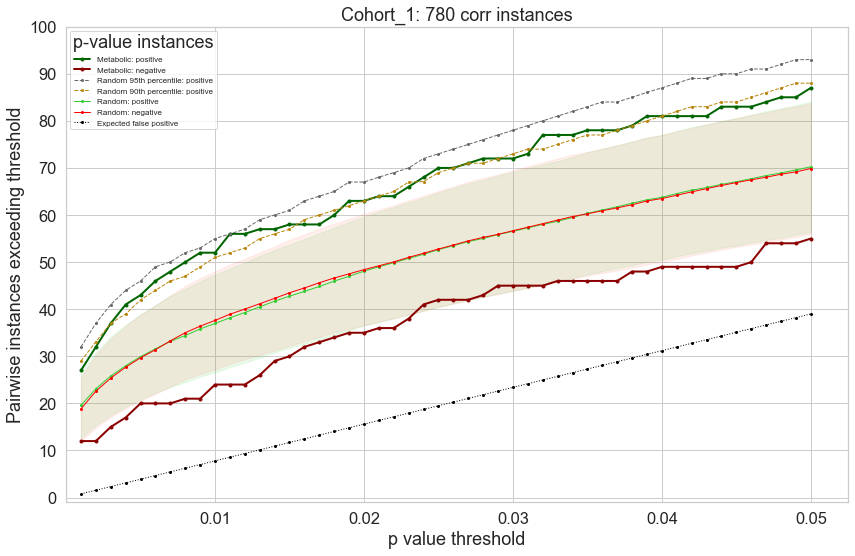

In [37]:
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 1.5,style="whitegrid")

ax = plt.figure(figsize=(14.014, 8.75))

plt.ylim(-1, 100)
plt.yticks([0,10,20,30,40,50,
            60,70,80,90,100])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_pos = df_p['pos cases'].tolist()
met_neg = df_p['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile90 = quantile90['pos cases'].tolist()

random_expectation = df_p['random expectation'].tolist()





plt.plot(x, met_pos, linewidth=2, markersize=3, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=2, markersize=3, marker = 'o',color='darkred')

plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
         marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
         marker = 'o',color='darkgoldenrod')



plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=2, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=2, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')

plt.plot(x, random_expectation, linewidth=1, markersize=2, linestyle='dotted',
         marker = 'o',color='black')
#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            
            "Random 95th percentile: positive",
            "Random 90th percentile: positive",
            
            "Random: positive",
            "Random: negative",
            
            "Expected false positive"], loc ="upper left",title="p-value instances",fontsize=8)

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p value threshold')
plt.ylabel('Pairwise instances exceeding threshold')
plt.title('Cohort_1: 780 corr instances')
plt.savefig('3CPlus.pdf', format='pdf', dpi=175)
plt.show()

#plt.savefig('3CPlus.png',dpi=350)

In [38]:
'''
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(18, 12))

plt.ylim(-1, 100)
plt.yticks([0,50,100])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_pos = df_p['pos cases'].tolist()
met_neg = df_p['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()

random_expectation = df_p['random expectation'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=3, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')

plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='mediumturquoise')
plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='coral')




plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=2, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=2, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')

plt.plot(x, random_expectation, linewidth=1, markersize=2, 
         marker = 'o',color='black',linestyle='dotted')
#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')





#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p value threshold')
plt.ylabel('Instances')
plt.title('Intertissue and within tissue')
plt.savefig('Interti',dpi=600)
'''

'\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(18, 12))\n\nplt.ylim(-1, 100)\nplt.yticks([0,50,100])\nplt.xticks([ 0.01,0.02,0.03,\n            0.04, 0.05])\nplt.xlim(0,0.0525)\n\nx = df_all_corr_averages.index.tolist()\nmet_pos = df_p[\'pos cases\'].tolist()\nmet_neg = df_p[\'neg cases\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_pos = df_all[\'pos lower\'].tolist()\nupper_bound_pos = df_all[\'pos higher\'].tolist()\n\nlower_bound_neg = df_all[\'neg lower\'].tolist()\nupper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = quantile95[\'pos cases\'].tolist()\npercentile05 = quantile05[\'neg cases\'].tolist()\n\nrandom_expectation = df_p[\'random expectation\'].tolist()\n\n\n\n\n\nplt.plot(x, met_pos, linewidth=3, markersize=3, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, met_neg, linewidth=3, markersize=6, marker = \'o\',color=\'darkred\')\n\nplt.plot(x, percentile95, 

In [39]:
ratio_quantile95 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)
ratio_quantile90 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [40]:
display(ratio_quantile95 )

pos cases  neg cases    ratios
corr thresholds                                
0.001                32.00      31.00  1.867083
0.002                37.00      37.00  1.750000
0.003                41.00      40.00  1.636688
0.004                44.00      43.00  1.647315
0.005                46.00      46.00  1.611325
0.006                49.00      48.00  1.590909
0.007                50.05      50.00  1.530441
0.008                52.00      52.00  1.500000
0.009                53.00      54.00  1.486429
0.010                55.00      56.00  1.467407
0.011                56.00      57.00  1.437500
0.012                57.00      59.00  1.434918
0.013                59.00      60.00  1.437625
0.014                60.00      61.05  1.450000
0.015                61.00      63.05  1.437576
0.016                63.00      64.05  1.423135
0.017                64.00      66.00  1.416944
0.018                65.00      67.00  1.409368
0.019                67.00      68.00  1.415014
0.020                67.00      69.00  1.419440
0.021                68.05      70.00  1.404762
0.022                69.00      71.00  1.400213
0.023                70.00      72.00  1.395373
0.024                72.00      73.00  1.384703
0.025                73.00      74.00  1.387097
0.026                74.00      75.00  1.380000
0.027                75.00      76.00  1.372238
0.028                76.00      77.00  1.384615
0.029                77.00      77.05  1.387307
0.030                78.00      79.00  1.382466
0.031                79.00      79.05  1.386022
0.032                80.00      81.00  1.389904
0.033                81.00      82.00  1.367347
0.034                82.00      83.00  1.373285
0.035                83.00      83.00  1.379345
0.036                84.00      84.05  1.377116
0.037                84.00      85.00  1.376660
0.038                85.00      85.00  1.377778
0.039                86.05      86.00  1.371063
0.040                87.00      87.00  1.372987
0.041                88.00      87.00  1.361871
0.042                89.00      88.00  1.354383
0.043                89.00      88.00  1.358599
0.044                90.00      89.00  1.350926
0.045                90.00      90.05  1.340143
0.046                91.00      91.00  1.333631
0.047                91.00      91.05  1.338235
0.048                92.00      92.05  1.318743
0.049                93.00      93.05  1.328607
0.050                93.00      94.00  1.326598

In [46]:
ratio_quantile95.to_csv('p_with_intra_95.csv')

In [41]:
display(ratio_quantile90)

pos cases  neg cases    ratios
corr thresholds                                
0.001                 29.0       28.0  1.615385
0.002                 33.1       33.0  1.541667
0.003                 37.0       36.0  1.500000
0.004                 39.0       39.0  1.462051
0.005                 42.0       42.0  1.400000
0.006                 44.0       44.0  1.400000
0.007                 46.0       46.0  1.379615
0.008                 47.0       48.0  1.350484
0.009                 49.0       50.0  1.350000
0.010                 51.0       51.0  1.333333
0.011                 52.0       52.0  1.318364
0.012                 53.0       54.0  1.333333
0.013                 55.0       55.0  1.333333
0.014                 56.0       56.0  1.322581
0.015                 57.0       58.0  1.316469
0.016                 59.0       59.0  1.312500
0.017                 60.0       60.0  1.290457
0.018                 61.0       61.1  1.295119
0.019                 62.0       62.0  1.290323
0.020                 63.0       64.0  1.296454
0.021                 64.0       65.0  1.289032
0.022                 65.0       66.0  1.294706
0.023                 67.0       67.0  1.288504
0.024                 67.1       68.0  1.294557
0.025                 69.0       69.0  1.282650
0.026                 70.0       70.0  1.290457
0.027                 71.0       71.0  1.289032
0.028                 71.0       72.0  1.278540
0.029                 72.0       72.1  1.276537
0.030                 73.0       73.0  1.277907
0.031                 74.0       74.0  1.282681
0.032                 74.0       75.0  1.268293
0.033                 75.0       76.0  1.268490
0.034                 76.0       77.0  1.263158
0.035                 77.0       77.1  1.262245
0.036                 77.0       78.0  1.261905
0.037                 78.0       79.0  1.266829
0.038                 79.0       79.1  1.264798
0.039                 80.0       81.0  1.262381
0.040                 81.0       81.0  1.259420
0.041                 82.0       82.0  1.264766
0.042                 83.0       83.0  1.255319
0.043                 83.0       84.0  1.255947
0.044                 84.0       84.0  1.254268
0.045                 84.0       85.0  1.253165
0.046                 85.0       86.0  1.250000
0.047                 86.0       86.0  1.250333
0.048                 87.0       87.0  1.250000
0.049                 88.0       87.1  1.241484
0.050                 88.0       88.0  1.239493

In [47]:
ratio_quantile90.to_csv('p_with_intra_90.csv')

In [42]:
df_all['ratio high std'] = df_all['ratios']+  df_all['ratio std']
df_all['ratio low std'] = df_all['ratios'] -  df_all['ratio std']

In [43]:
display(df_all.head(3))

pos cases  neg cases    ratios   pos std   neg std  \
corr thresholds                                                       
0.001               19.588     18.837  1.039868  6.967554  6.819159   
0.002               23.112     22.587  1.023243  7.721857  7.720754   
0.003               25.827     25.373  1.017893  8.323001  8.268509   

                 ratio std  pos lower  pos higher  neg lower  neg higher  \
corr thresholds                                                            
0.001             0.531210  12.620446   26.555554  12.017841   25.656159   
0.002             0.417666  15.390143   30.833857  14.866246   30.307754   
0.003             0.365276  17.503999   34.150001  17.104491   33.641509   

                 ratios std plus  ratios std minus  ratio high std  \
corr thresholds                                                      
0.001                   1.571079          0.508658        1.571079   
0.002                   1.440909          0.605578        1.440909   
0.003                   1.383169          0.652617        1.383169   

                 ratio low std  
corr thresholds                 
0.001                 0.508658  
0.002                 0.605578  
0.003                 0.652617

In [48]:
df_all.to_csv('p_with_intra_all.csv')

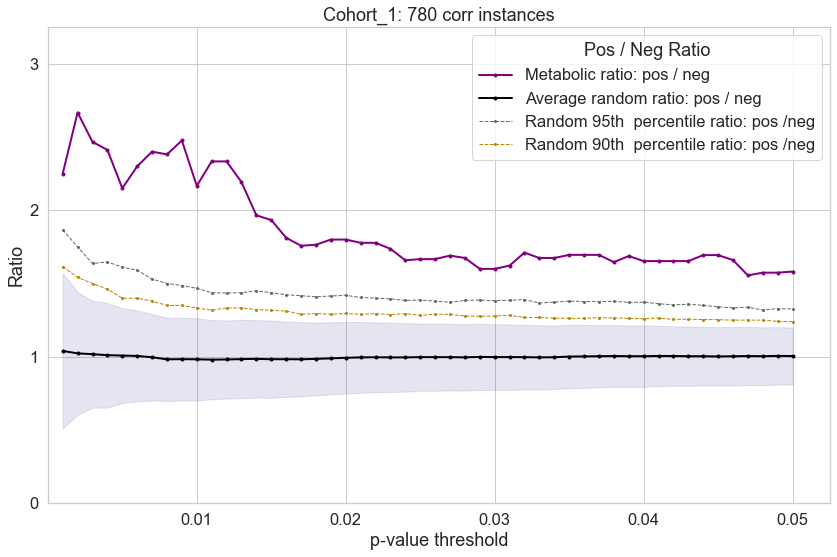

In [44]:
sns.set(font_scale = 1.5,style="whitegrid")

ax = plt.figure(figsize=(14.014, 8.76))

plt.ylim(0, 3.25)
plt.yticks([0,1,2,3])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_ratio = df_p['ratio'].tolist()
avg_ratio = df_all['ratios'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratio low std'].tolist()
upper_bound_ratio = df_all['ratio high std'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=2, markersize=3, marker = 'o',color='purple')
plt.plot(x, avg_ratio, linewidth=2, markersize=3, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg",
            "Random 95th  percentile ratio: pos /neg",
            "Random 90th  percentile ratio: pos /neg",
            #"Random 5th percentile: negative",
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper right",title="Pos / Neg Ratio")
            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p-value threshold')
plt.ylabel('Ratio')
plt.title('Cohort_1: 780 corr instances')
plt.savefig('4CPlus.pdf',dpi=175,format='pdf')

In [45]:
'''
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))

plt.ylim(0, 3.25)
plt.yticks([0,1,2,3])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_ratio = df_p['ratio'].tolist()
avg_ratio = df_all['ratios'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratio low std'].tolist()
upper_bound_ratio = df_all['ratio high std'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 
plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile99, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')



plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='navy')
plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
            marker = 'o',color='mediumturquoise')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg",
            "Random 95th  percentile ratio: pos /neg",
            #"Random 5th percentile: negative",
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper right",title="Ratio")
          
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p-value threshold')
plt.ylabel('Ratio')
plt.title('Intertissue and within tissue')
plt.savefig('interplus p ratio no legend',dpi=600)
'''

'\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(16, 10))\n\nplt.ylim(0, 3.25)\nplt.yticks([0,1,2,3])\nplt.xticks([ 0.01,0.02,0.03,\n            0.04, 0.05])\nplt.xlim(0,0.0525)\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_p[\'ratio\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratio low std\'].tolist()\nupper_bound_ratio = df_all[\'ratio high std\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = \'o\',color=\'black\')\nplt.plot(x, percentile95, linewidth=1, markersize=2, linestyle=\'dashed\',\n   